### Importing All The Required Libraries

In [23]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
import warnings
warnings.filterwarnings('ignore')

### Reading The Data

In [25]:
df = pd.read_csv(r'C:\Users\RAJESH\OneDrive\Desktop\app_dep\web_app\train.csv')

In [26]:
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [27]:
df.shape

(1278, 3)

In [28]:
x = df[['col1','col2']]
y = df[['output']]

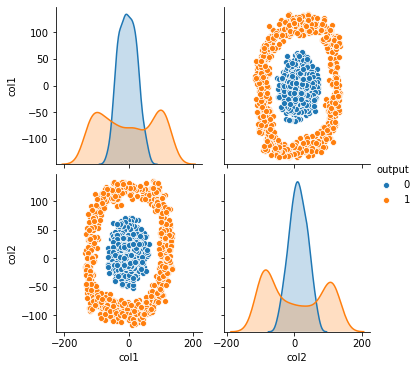

In [29]:
sns.pairplot(df, hue='output')

### Data Preparation Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

### Training

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### Predictions

In [74]:
y_pred = classifier.predict(X_test)

### Accuracy Score For LogisticRegression

In [75]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.609375

### Classification Report

In [76]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.61      1.00      0.76       195

    accuracy                           0.61       320
   macro avg       0.30      0.50      0.38       320
weighted avg       0.37      0.61      0.46       320



### Training Using SVM With Linear Kernel

In [77]:
from sklearn.svm import SVC
classifier_linear = SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [78]:
y_pred = classifier_linear.predict(X_test)

In [79]:
metrics.accuracy_score(y_test, y_pred)

0.609375

In [80]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[  0, 125],
       [  0, 195]], dtype=int64)

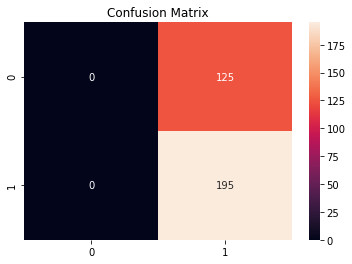

In [81]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [82]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.61      1.00      0.76       195

    accuracy                           0.61       320
   macro avg       0.30      0.50      0.38       320
weighted avg       0.37      0.61      0.46       320



### Training Using SVM With RBF Kernel

In [95]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel='rbf')
classifier_rbf.fit(X_train, y_train)

SVC()

In [96]:
y_pred = classifier_rbf.predict(X_test)

In [97]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [92]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[125,   0],
       [  0, 195]], dtype=int64)

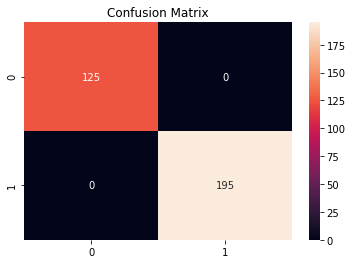

In [93]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [94]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       195

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



### Dump pickle

In [99]:
from pickle import dump
dump(classifier_rbf,open('rbf_pickle.pkl','wb'))

### Observation

The Support Vector Machines algorithm is much more geometrically motivated Than The logistic regression comes from generalized linear regression. SVM with a non-linear kernel like a RBF gives best accuracy than other models.